<a href="https://www.kaggle.com/code/imenbakir/mnist-auto-encoders?scriptVersionId=128675058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

import warnings
warnings.filterwarnings("ignore") #used to stop unwanted warnings from showing when you execute codes

In [18]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print('dimension of X_train :', X_train.shape)
print('dimension of X_test :', X_test.shape)
print('dimension of y_train :', y_train.shape)
print('dimension of y_test :', y_test.shape)

dimension of X_train : (60000, 28, 28)
dimension of X_test : (10000, 28, 28)
dimension of y_train : (60000,)
dimension of y_test : (10000,)


In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[1]

0

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
#28*28 =784 shape of our image
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#convert them to float 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
#Normalization to make our values between : [0,1]
X_train /=255
X_test /=255

## Deep Autoencoder

In [19]:
# Define input layer
input_img = Input(shape=(784,))

# Define encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Define autoencoder model
autoencoder = Model(input_img, decoded)

In [21]:
# Reshape the data into 1D arrays
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
# Train the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 14ms/step - loss: 0.2429 - val_loss: 0.1677
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1487 - val_loss: 0.1353
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1310 - val_loss: 0.1247
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1224 - val_loss: 0.1176
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1157 - val_loss: 0.1117
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1111 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1079 - val_loss: 0.1052
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1054 - val_loss: 0.1030
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1035 - val_loss: 0.1014
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1017 - val_lo

In [23]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136

In [24]:
# Generate reconstructed images
reconstructed_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
encoded_imgs = autoencoder.predict(X_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


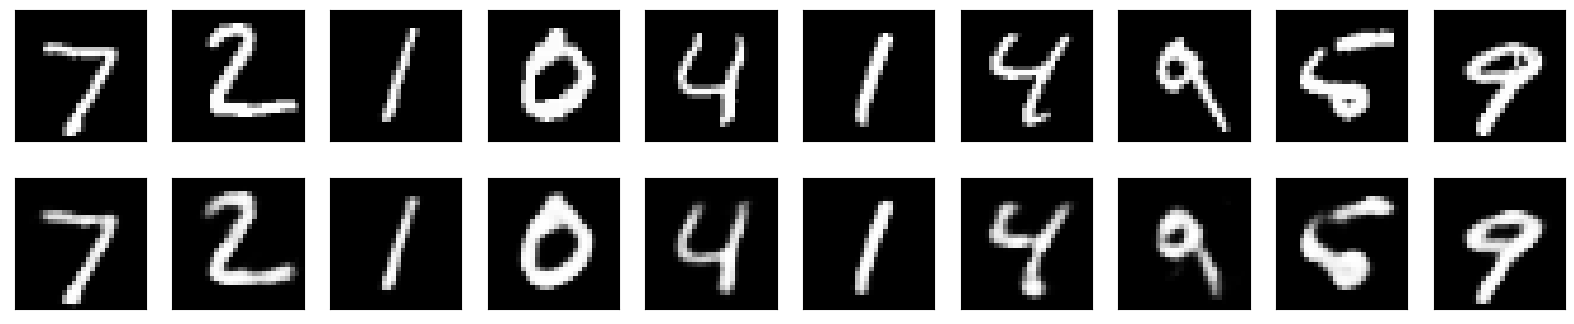

In [28]:
n=10

# Plot original vs reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n): 
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Denoising images